# PHASE 2 PROJECT
**Presented by:** Group 4.4
***

## Dennis Mwanzia 
## Pamela Awino 
## Ian Macharia
## Samuel Igecha
## Pauline Njeri

# 1.0  Project Introduction and Overview

The aim of this project is to put into practice our newly aqcuired skills in data science to formulate and solve a real business problem. In this project, we are given a raw dataset which is the house sales prices in Northwestern County and we are supposed to formulate a real business case study and use the data to solve the business problem and provide a useful business advisory which can be used to formulate real and valuable business decisions. Unlike in phase 1, we are not given the business problem, its upon us to formulate it.

## 1.1 Data Understanding

In [71]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
plt.style.use('seaborn')

import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import pearsonr
from statsmodels.stats.outliers_influence import variance_inflation_factor


import pickle
import json

import folium 
from folium import plugins
from folium.plugins import HeatMap


from my_functions import clean_data, round_bathrooms, remove_outliers, x_coord, fit_simple_linear_reg, fit_multiple_linear_reg, calculate_rmse, fit_polynomial_reg, plot_partial_residuals_all


We have been provided with King County House Sales dataset found in 'kc_house_data.csv'. There is a description of columns dataset found in the md folder 'column_names.md'. Therefore, we examine the column descriptions to understand their meaning.

In [72]:
#Unpacking the description 
with open('data/column_names.md', 'r') as f:
    md_text = f.read()

print(md_text)

# Column Names and Descriptions for King County Data Set
* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type

In this problem, we have been given a dataset that contains the following variables;
1. id - unique identified for a house
2. dateDate - house was sold
3. pricePrice - is prediction target
4. bedroomsNumber - of Bedrooms/House
5. bathroomsNumber - of bathrooms/bedrooms
6. sqft_livingsquare - footage of the home
7. sqft_lotsquare - footage of the lot
8. floorsTotal - floors (levels) in house
9. waterfront - House which has a view to a waterfront
10. view - Has been viewed
11. condition - How good the condition is ( Overall )
12. grade - overall grade given to the housing unit, based on King County grading system
13. sqft_above - square footage of house apart from basement
14. sqft_basement - square footage of the basement
15. yr_built - Built Year
16. yr_renovated - Year when house was renovated
17. zipcode - zip
18. lat - Latitude coordinate
19. long - Longitude coordinate
20. sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
21. sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

## Business Understanding

## Business Problem

The business problem is to provide guidance to Kings Wajenzi Developers, a prospective real estate developer in King County, on the most profitable types of properties to target in the current market. The guidance will include recommendations on optimal locations to develop properties, features most desired by customers and have the greatest impact on prices of properties, and season of year when homeowners are most likely to purchase properties. Our objective as Wataalamu Analytics Advisors is to analyze house sales data in King County which was collected between May 2014 and May 2015 and leverage the insights generated to guide the developer in selecting the most profitable properties to develop and maximize their profits. With King County's population on the rise and income stabilizing after the COVID-19 pandemic, demand for new homes in the area is at an all-time high.

## 1.2 Objectives

* To determine whether the time of year affects the price of a house and identify the most profitable seasons/months.

* To investigate whether location affects house prices in King County and identify the areas that attract the highest prices.

* To determine which features/attributes have the highest impact on the sales price of houses/properties in King County and identify the features that developers should focus on when developing upcoming projects in the area.

### Guiding Questions
####### What to answer

1. Does the time of the year affect the price of an house? If yes, which seasons/Months are most profitable?
2. Does Location affect prices? If yes, which locations within King county attract highest price of houses?
3. Which features/Attributes have the highest impact on sales price of houses/properties? Which features should the developer focus on when developing their upcoming projects in King County?


## Methodology

##### This project follows the OCEMiN Data Science framework for data analysis
1.	Obtain/import data
* We will import data from King County House Data provided as csv, using Pandas library.
2.	Clean/ Scrub data
* We will employ several data cleaning methods to modify and prepare the dataset for analysis.
3.	Explore data/EDA
* Analyzing and visualizing the cleaned data to gain insights, identify patterns and relationships, and formulate hypotheses.
4.	Model/Develop the predictive Model
*  Develop and evaluate predictive models using the data.
5.	Interpret Data
* Draw conclusions and make decisions based on the results of the analysis.

### 1.0 Importing Data

In [83]:
df = pd.read_csv('data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [84]:
df.shape

(21597, 21)

The dataset has 21597 rows and 21 columns

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

The whole dataset is stored as pandas dataframe. We have three types of datatypes for columns which are integers, floats and objects. Since we are interested in running a linear regression model, we would like all the columns, to be numeric datatypes. However, some columns like `date`, `waterfront`, `view`, `condition`, `grade`, `sqft_basement` are objects and most likely categorical variables and will need to be transformed to dummy variables using one-hot encoding function of python. Intergers will also need to be examined to determine if they are binary variables or numeric data types. 
Its very important to note that sqft_basement should be of value type float based on the data preview done above. Therefore, we will need to investigate that column to find out why it appears as object instead of float.
The `date` column will need to be transformed to month and year columns as we seek to engineer a new feature named `seasons` to answer our first question.
The columns `waterfront`, `view`, `condition`, `grade` need to be investigated and necessary transformations done in order to make them dummy variables for our model. 

### 2.0 Data Cleaning

We will begin by checking the data for missing values. 

In [86]:
#Checking for how many missing values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

From the above output, we can see that Waterfront, view and year renovated have missing values. Lets check the percentage of missing values in the dataset. We can then calculate the percentage of missing values to see their magnitude and determine if we will drop the columns or just replace the missing values with appropriate replace values. 

In [87]:
# Get percentage of missing values
for col in ['waterfront', 'view', 'yr_renovated']:
    percent_missing = df[col].isnull().sum() * 100 / len(df)
    print(f"{col}:{round(percent_missing,2)}")

waterfront:11.0
view:0.29
yr_renovated:17.79


`Waterfront`, `view` and `yr_renovated` columns have 11.0%, 0.29%, and 17.79% respectively of missing data. `Waterfront`, and `view` are of data type objects and therefore, we should replace the missing values with the mode. The `yr_renovated` shows the year in which renovations occurred and therefore, we should interpret the missing values to mean that no renovation occurred for those particular properties. Therefore, we will replace the missing values with zeros. 

Let us check the most common values for `waterfront` and `view` columns which we will use to replace the missing values. 

In [88]:
print ("Waterfront Mode:",df['waterfront'].mode()[0])
print ("view mode:", df['view'].mode()[0])

Waterfront Mode: NO
view mode: NONE


Let us investigate the `sqft_basement` column to find out why it appeard as object data type whereas the vaalues inside show it should be Float data type.

In [89]:
# Investigate sqft_basement column
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [90]:
# Get summary statistics for sqft_basement
df['sqft_basement'].describe()

count     21597
unique      304
top         0.0
freq      12826
Name: sqft_basement, dtype: object

There is a significant number of entries with placeholder `?` as value for `sqft_basement`. Moreover, more than half of entries have a value of 0 indicating the properties did not have a basement and therefore, replace the placeholder with `0`. 

We discovered the data cleaning was occupying too much of our time and therefore created a function *clean_data* that we applied below. 

In [91]:
df = clean_data(df).copy()
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,year_sold,age,renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,0,0,...,0.0,98178,47.5112,-122.257,1340,5650,10,2014,60,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,0,0,...,1991.0,98125,47.7210,-122.319,1690,7639,12,2014,64,0
2,180000.0,2,1.00,770,10000,1.0,0,0,0,0,...,0.0,98028,47.7379,-122.233,2720,8062,2,2015,82,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,0,0,...,0.0,98136,47.5208,-122.393,1360,5000,12,2014,50,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,0,0,...,0.0,98074,47.6168,-122.045,1800,7503,2,2015,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0,0,0,0,...,0.0,98103,47.6993,-122.346,1530,1509,5,2014,6,0
21593,400000.0,4,2.50,2310,5813,2.0,0,0,0,0,...,0.0,98146,47.5107,-122.362,1830,7200,2,2015,1,1
21594,402101.0,2,0.75,1020,1350,2.0,0,0,0,0,...,0.0,98144,47.5944,-122.299,1020,2007,6,2014,6,0
21595,400000.0,3,2.50,1600,2388,2.0,0,0,0,0,...,0.0,98027,47.5345,-122.069,1410,1287,1,2015,11,0


In [92]:
# check if all missing values have been resolved
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
month_sold       0
year_sold        0
age              0
renovated        0
dtype: int64

We no longer have any missing values, therefore we proceed to check for duplicates.

In [101]:
#checking for duplicates

print("Number of duplicated values:", df.duplicated().sum())

duplicate_rows = df[df.duplicated()]
duplicate_rows

Number of duplicated values: 2


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,year_sold,age,renovated
4348,259950.0,2,2.00,1070,649,2.0,0,0,0,0,...,0.0,98106,47.5213,-122.357,1070,928,3,2015,7,0
20508,529500.0,3,2.25,1410,905,3.0,0,0,0,0,...,0.0,98116,47.5818,-122.402,1510,1352,3,2015,1,1


We have two duplicates but upon closer examination, the two rows are not duplicates but rather may have arised as a result of data updates, data merging or entry errors.
Next, we can proceed to investigate the integer and object data types and perform the necessary transformations for our multiple regression model.

In [102]:
# Confirming the data is clean and columns are of proper data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   price          21597 non-null  float64 
 1   bedrooms       21597 non-null  int64   
 2   bathrooms      21597 non-null  float64 
 3   sqft_living    21597 non-null  int64   
 4   sqft_lot       21597 non-null  int64   
 5   floors         21597 non-null  float64 
 6   waterfront     21597 non-null  category
 7   view           21597 non-null  category
 8   condition      21597 non-null  category
 9   grade          21597 non-null  category
 10  sqft_above     21597 non-null  int64   
 11  sqft_basement  21597 non-null  float64 
 12  yr_renovated   21597 non-null  float64 
 13  zipcode        21597 non-null  category
 14  lat            21597 non-null  float64 
 15  long           21597 non-null  float64 
 16  sqft_living15  21597 non-null  int64   
 17  sqft_lot15     21597 non-null  

In [104]:
# Investigatin bathroom column
# Get unique values
df['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

Bathrooms appear as float and we would expect bathrooms to be integers, so upon researching from common real estate jargon in the United states, bathrooms can be described with floats or fractions to indicate not a full bathroom or with an additional feature such as a sink. 

#### Checking for Outliers

After rigourous data clean up, we the try and finetune the data for ploting, visualization and subsequent modelling.

#### Boxplots

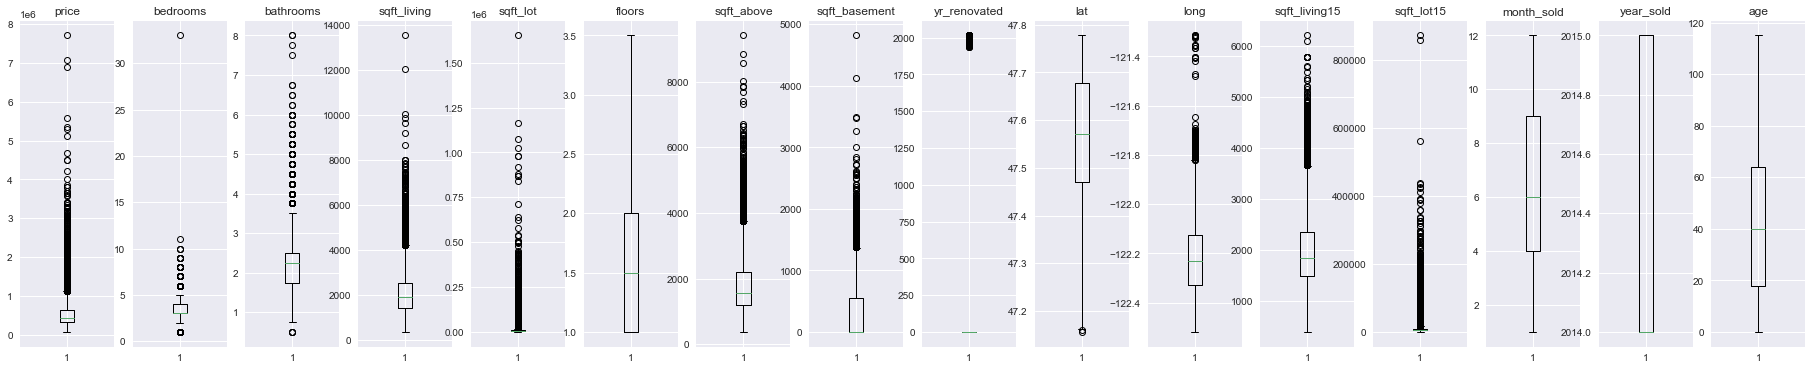

In [109]:
# Select the variables you want to plot
cols_to_plot = df.select_dtypes(include=['int64', 'float64']).columns

# Create a subplot grid
fig, axes = plt.subplots(nrows=1, ncols=len(cols_to_plot), figsize=(32, 6))

# Create a boxplot for each variable in a separate subplot
for i, col in enumerate(cols_to_plot):
    axes[i].boxplot(df[col])
    axes[i].set_title(col)

plt.show()


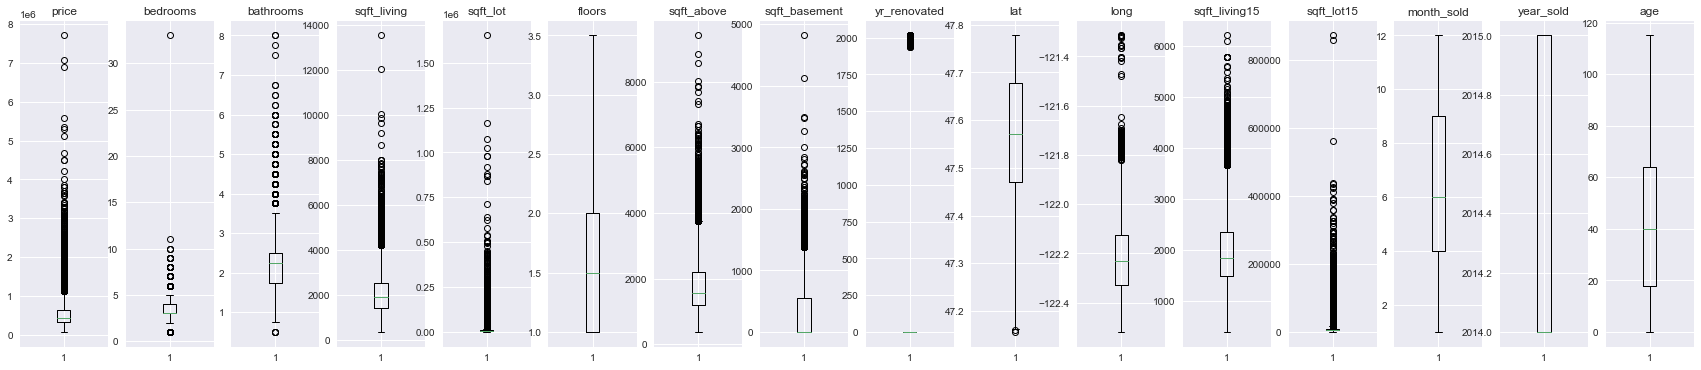

In [110]:
# Drop the irrelant columns for box plot purposes

# Select the categorical variables to drop and then generate boxplots
cols_to_plot = df.select_dtypes(include=['int64', 'float64']).columns.drop([])

# Create a subplot grid
fig, axes = plt.subplots(nrows=1, ncols=len(cols_to_plot), figsize=(30, 6))

# Create a boxplot for each variable in a separate subplot
for i, col in enumerate(cols_to_plot):
    axes[i].boxplot(df[col])
    axes[i].set_title(col)

plt.show()


Columns to plot: Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above', 'sqft_basement', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month_sold', 'year_sold', 'age'],
      dtype='object')


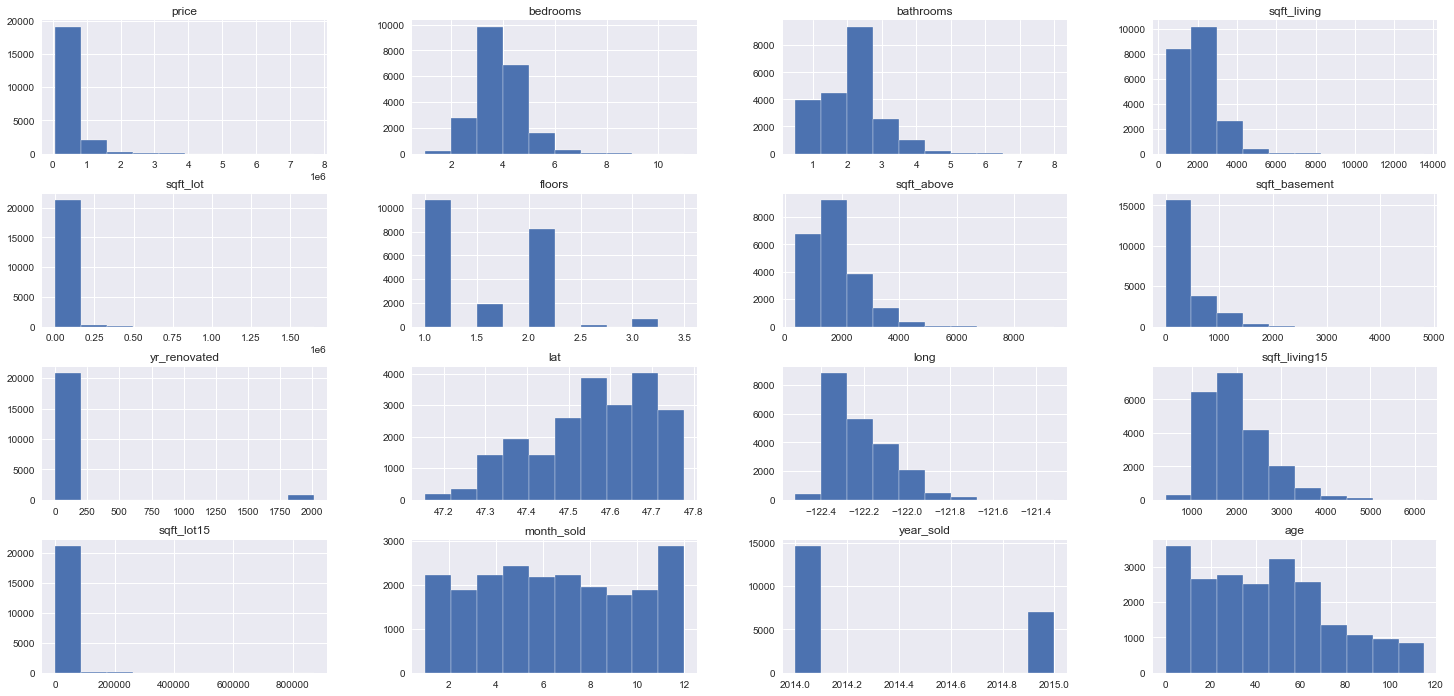

In [131]:
# Histogram plots for each data
# Select the numerical variables you want to plot
num_cols_to_plot = df.select_dtypes(include=['int64', 'float64']).columns.drop([])
print("Columns to plot:",num_cols_to_plot )
# Create a histogram for each variable
df[num_cols_to_plot].hist(figsize=(25, 12))
plt.savefig('Columnstoplot')
plt.show()


We dropped `view`, `grade`,`condition`, `zipcode` because they are categorical variables and therefore cannot be reasonably visualized using either box plots or histograms.
`Floors`, `age`, `year_Sold`, `month_sold` do not appear to have outliers. 
Therefore, we consider potential outliers in `bedrooms`, `bathrooms`, `sqft_living`, `sqft_lot`, `floors` and `sqft_above` features.

In [121]:
# Investigate bedrooms
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

The houses with 33, 11 and 10 bedrooms need to be examined.

In [127]:
bedroom_counts = [33, 11, 10]
columns_to_show = ['floors', 'price', 'sqft_living', 'waterfront', 'bathrooms', 'bedrooms']
houses_to_examine = df[df['bedrooms'].isin(bedroom_counts)][columns_to_show]
print(houses_to_examine)

       floors      price  sqft_living waterfront  bathrooms  bedrooms
8748      2.0   520000.0         3000          0       3.00        11
13301     1.0  1150000.0         4590          0       5.25        10
15147     2.0   650000.0         3610          0       2.00        10
15856     1.0   640000.0         1620          0       1.75        33
19239     2.0   660000.0         2920          0       3.00        10


From the above output, houses with 10 and 11 bedrooms appear to be appropriate based on their `prices`, `bathrooms`, and `sqft_living`. However, the 33 bedroom house has 2 bathrooms and a sale price of $640000 and it must have been a 3 bedroom house recorded as 33.
Therefore, we will replace 33 with 3 bedrooms. 

In [129]:
# accesing the row index for that row using .loc, 
#we then specify the column and replace as described above.
df.loc[15856, 'bedrooms'] = 3

To remove other outliers,  we will apply the statistical method, that calculate the z-score of the feature columns. 
The functiion takes in the dataframe , calculates the z-score per column then removes any value that falls within $z-score > |3|$





In [132]:
# Apply function to df
df = remove_outliers(df)

### 3.0 Data Exploration

#### Investigating Price

We proceed to investigate `price` and its relationship with house features, however since price appears to have outliers, i.e. houses with very high prices and others with very low prices. We will group price into three categories; Upper price, Median price and Low price where, upper price = 75% percentile, median price = 50% percentile and the low price = 25% percentile. 

In [140]:
# We want to Group price into three cartegories 
# Define the percentile values for each category
price = df['price']
high_percentile = np.percentile(price, 75)
low_percentile = np.percentile(price, 25)

# Group the prices into categories based on the percentiles
high_prices = price[price > high_percentile]
medium_prices = price[(price >= low_percentile) & (price <= high_percentile)]
low_prices = price[price < low_percentile]

# Print the results
#print("High prices:", high_prices)
#print("Medium prices:", medium_prices)
#print("Low prices:", low_prices)

print("Highest Price:", high_prices.max())
print("Median Price:", medium_prices.median())
print("Lowest price:", low_prices.min())

Highest Price: 3400000.0
Median Price: 441000.0
Lowest price: 78000.0


#### 1. How do different priced houses relate with the number  of bedrooms?

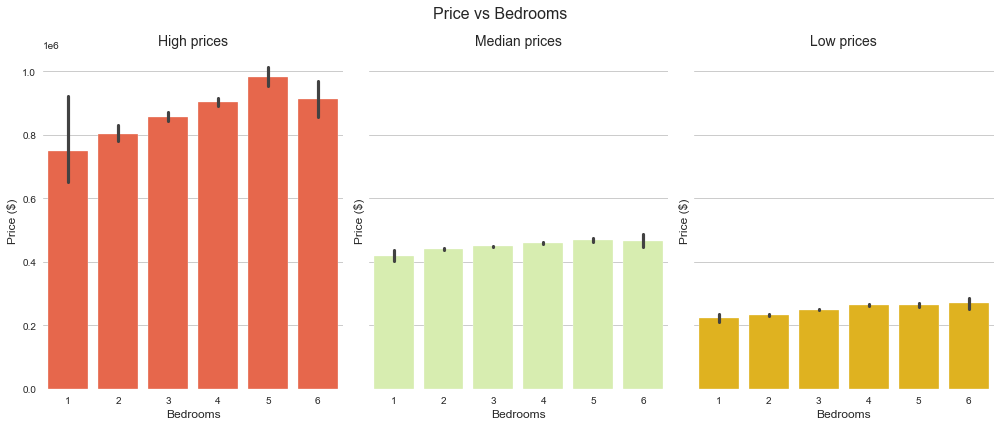

In [28]:
x = df['bedrooms']
y1 = high_prices
y2 = medium_prices
y3 = low_prices

# set plot style
sns.set_style("whitegrid")

# set colors
colors = ["#FFC300", "#DAF7A6", "#FF5733"]

# create figure
fig, ax = plt.subplots(ncols=3, figsize=(14,6), sharey=True)

# bar plot
sns.barplot(x=x, y=y1, color=colors[2], ax=ax[0])
ax[0].set_title("High prices", fontsize=14)
ax[0].set_xlabel("Bedrooms", fontsize=12)
ax[0].set_ylabel("Price ($)", fontsize=12)

# bar plot
sns.barplot(x=x, y=y2, color=colors[1], ax=ax[1])
ax[1].set_title("Median prices", fontsize=14)
ax[1].set_xlabel("Bedrooms", fontsize=12)
ax[1].set_ylabel("Price ($)", fontsize=12)

# bar plot
sns.barplot(x=x, y=y3, color=colors[0], ax=ax[2])
ax[2].set_title("Low prices", fontsize=14)
ax[2].set_xlabel("Bedrooms", fontsize=12)
ax[2].set_ylabel("Price ($)", fontsize=12)

# set title for the whole figure
fig.suptitle("Price vs Bedrooms", fontsize=16)

# adjust spacing
fig.tight_layout()

# show plot
plt.show()



Here, we can see that the larger the number of bedrooms, the higher the prices as well. For average and low-priced houses, there isn't much of an increase but more of constant with a slight increase in prices with the number of bedrooms.

#### 2. How do different priced houses relate with the number  of bathrooms?

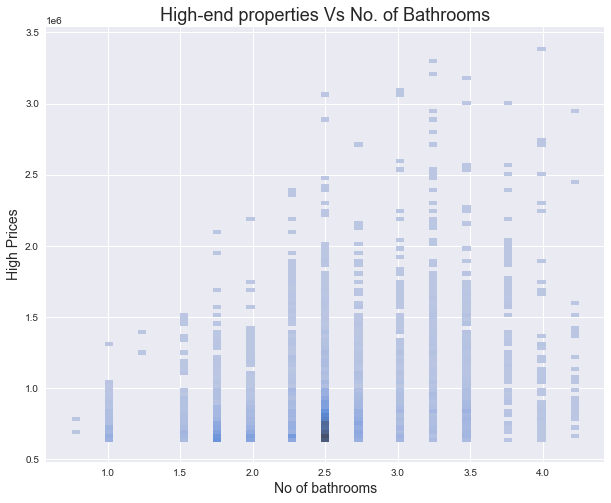

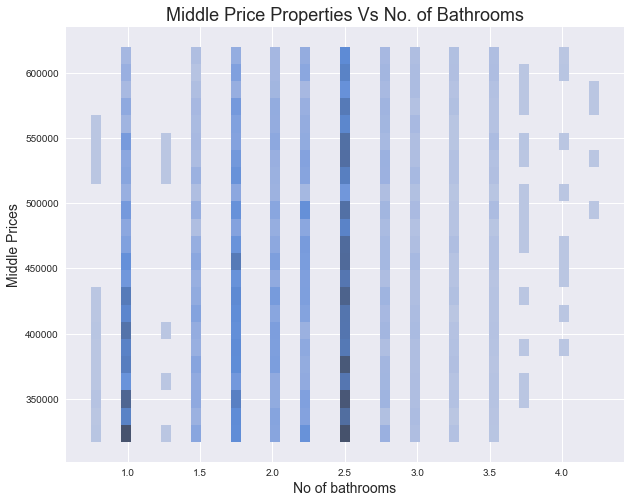

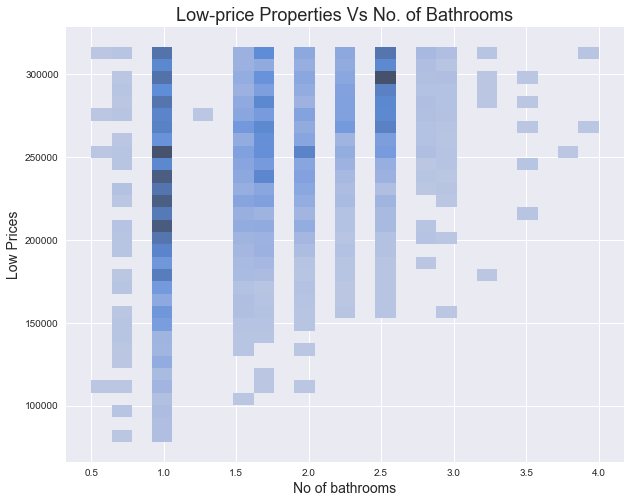

In [158]:
# plotting price against bathrooms
#data
x = df['bathrooms']
y1 = high_prices
y2 = medium_prices
y3 = low_prices

# Histogram plots
# High prices vs No. of bathrooms
fig, ax = plt.subplots( figsize=(10,8))
sns.histplot(x=x, y=y1, ax=ax )
plt.title('High-end properties Vs No. of Bathrooms', fontsize=18)
plt.xlabel('No of bathrooms', fontsize=14)
plt.ylabel('High Prices', fontsize=14);

# median price vs No. of bathrooms
fig, ax1 = plt.subplots( figsize=(10,8))
sns.histplot(x=x, y=y2, ax=ax1)
plt.title('Middle Price Properties Vs No. of Bathrooms', fontsize=18)
plt.xlabel('No of bathrooms', fontsize=14)
plt.ylabel('Middle Prices', fontsize=14);

# low price vs No. of bathrooms
fig, ax2 = plt.subplots( figsize=(10,8))
sns.histplot(x=x, y=y3, ax=ax2)
plt.title('Low-price Properties Vs No. of Bathrooms', fontsize=18)
plt.xlabel('No of bathrooms', fontsize=14)
plt.ylabel('Low Prices', fontsize=14);


In [160]:
# Number of dataentries per bedrooms
df['bathrooms'].value_counts()

2.50    5242
1.00    3820
1.75    2998
2.25    2018
2.00    1892
1.50    1430
2.75    1142
3.00     701
3.50     593
3.25     489
3.75     109
4.00      72
0.75      71
4.25      30
1.25       9
0.50       4
Name: bathrooms, dtype: int64

From the Histogram we observed that the majority of median and high-end properties had a higher density at two bathrooms with and aditional bathtub, toilet or sink. 
From the high end we also noticed that the density was more towards the median showing that there is little difference that distinguished them from the median. 
For the low price range the density was more on one bedroomed houses indicating a prevalence of studio apartments.

The histograms suggest that the number of bathrooms is positively correlated with the price of properties. However, we need to perform statistical analysis to confirm this relationship and identify the strength of the relationship.

### 3. How do different-priced houses relate with the seasons?

In [163]:
#create a dictionary mapping month numbers to month names
import calendar

month_dict = dict(enumerate(calendar.month_name))

# apply the dictionary to the month_sold column to get month names
df['month_name'] = df['month_sold'].apply(lambda x: month_dict[x])

# define seasons based on months
seasons = {'Winter': ['December', 'January', 'February'],
           'Spring': ['March', 'April', 'May'],
           'Summer': ['June', 'July', 'August'],
           'Fall': ['September', 'October', 'November']}

# create a new 'season' column based on the 'month_sold' column
df['season'] = df['month_name'].apply(lambda x: next((season for season, months in seasons.items() if x in months), None))
df['season'].value_counts()

Spring    6225
Summer    6050
Fall      4817
Winter    3528
Name: season, dtype: int64

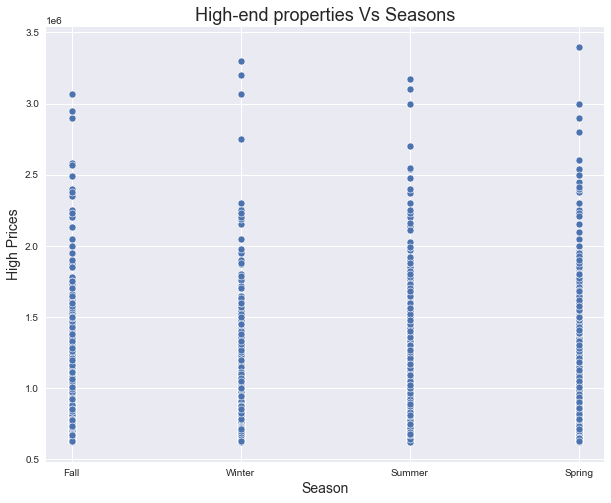

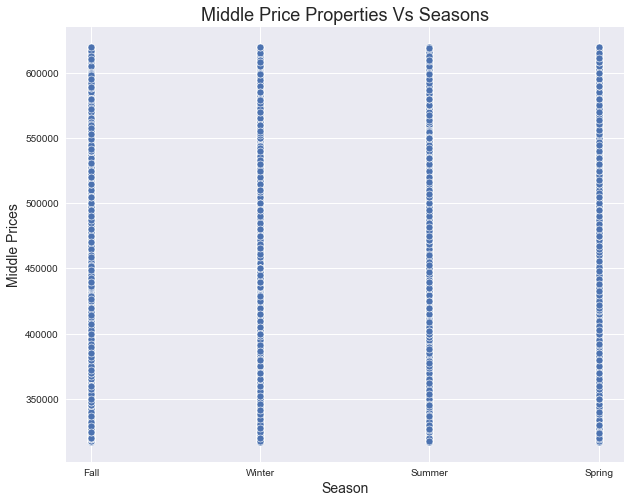

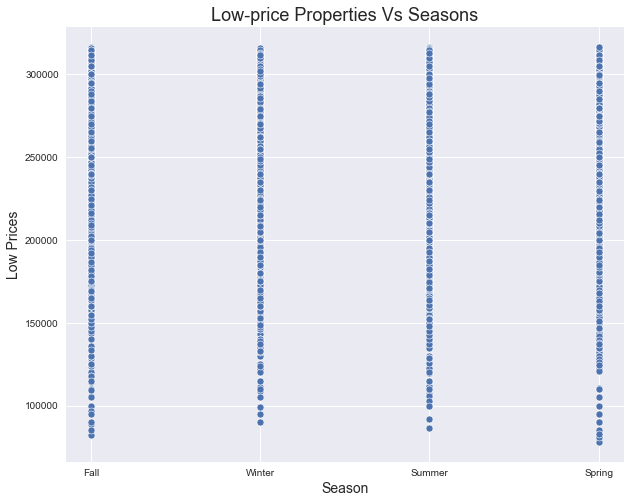

In [168]:
# Plotting price vs seasons

x = df['season']
y1 = high_prices
y2 = medium_prices
y3 = low_prices


# Scatter plots

# High prices vs No. of bathrooms
fig, ax0 = plt.subplots( figsize=(10,8))
sns.scatterplot(x=x, y=y1, ax=ax0)
plt.title('High-end properties Vs Seasons', fontsize=18)
plt.xlabel('Season', fontsize=14)
plt.ylabel('High Prices', fontsize=14);

# median price vs No. of bathrooms
fig, ax1 = plt.subplots( figsize=(10,8))
sns.scatterplot(x=x, y=y2, ax=ax1)
plt.title('Middle Price Properties Vs Seasons', fontsize=18)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Middle Prices', fontsize=14);

# low price vs No. of bathrooms
fig, ax2 = plt.subplots( figsize=(10,8))
sns.scatterplot(x=x, y=y3, ax=ax2)
plt.title('Low-price Properties Vs Seasons', fontsize=18)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Low Prices', fontsize=14);

Based on the provided data, the scatter plots show the relationship between the season and the prices of properties in the dataset. From the count of properties sold in each season, it appears that spring and summer are the most popular seasons for home buying, while fall and winter have comparatively fewer sales.

The scatter plots of high-end, medium, and low-price properties against the season show that the prices of properties are generally consistent across all seasons. However, there is a slight increase in the number of high-end properties sold in the spring and a decrease in the number of low-priced properties sold in the winter.

This pattern may be due to various factors, including the perceived desirability of certain seasons for buying and selling homes, the availability of listings during different seasons, or even the preferences of buyers and sellers. For example, the spring season may be associated with better weather conditions and more opportunities for home viewing, which may increase demand for high-end properties. Conversely, the winter season may be associated with lower sales of low-priced properties due to holiday expenses and colder weather. However, further analysis would be necessary to determine the exact reasons for these trends.

##  Seasons

In [32]:
# Group by season and month_sold, and count the number of sales for each group
season_sales = df.groupby(['season', 'month_sold'])['price'].count()
# Find the season with the most sales

best_season = season_sales.groupby('season').max()

# Sort the seasons by total sales in descending order
best_season = best_season.sort_values(ascending=False)

# Print the season and corresponding months with the amount sold in each season
for season in best_season.index:
    months = ', '.join(seasons[season])
    sales = season_sales.loc[season]
    print(f"{season} ({months}): {sales.sum()} sales")
    print(sales)

Spring (March, April, May): 6246 sales
month_sold
3    1813
4    2144
5    2289
Name: price, dtype: int64
Summer (June, July, August): 6075 sales
month_sold
6    2091
7    2118
8    1866
Name: price, dtype: int64
Fall (September, October, November): 4829 sales
month_sold
9     1698
10    1785
11    1346
Name: price, dtype: int64
Winter (December, January, February): 3542 sales
month_sold
1      935
2     1204
12    1403
Name: price, dtype: int64


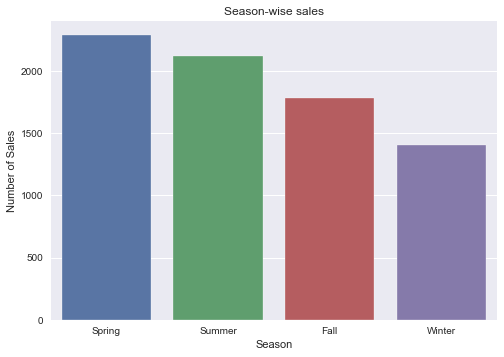

In [172]:
# Create a bar chart to show the sales for each season
sns.barplot(x=best_season.index, y=best_season.values)
plt.title('Season-wise sales')
plt.xlabel('Season')
plt.ylabel('Number of Sales')
plt.show()

Looking at the sales data, we can see that the spring months of March, April, and May are the best for selling houses with a total of 6518 sales. This is likely due to the fact that Spring is a time of renewal and growth, and people may be more willing to make big changes such as buying a new home during this time. May is the most popular month for selling homes within Spring, with 2414 sales.

Summer, which comprises the months of June, July, and August, had a slightly lower total sales of 6328 compared to spring. July had the highest sales with 2211 followed by June with 2178 and 
August with 1939.

The fall season of September, October, and November had a total of 5056 sales, with October having the highest sales of 1876 followed by September with 1771 and November with 1409.

Lastly, the winter season of December, January, and February had the lowest total sales of 3695. December had the highest sales with 1470 followed by February with 1247 and January with 978. This may be due to the fact that Winter is a time when people tend to stay indoors and may be less inclined to go through the hassle of buying or selling a home.

Overall, it is important to note that this conclusion is based solely on the provided data and may not be reflective of larger trends in the housing market. Additionally, there may be some inaccuracies in the data such as missing or incomplete records, which could affect the accuracy of these findings.


#### 4. How does Location affect the Sale Price of a house?

Location is key when it comes to real estate. Our second objective seeks to understand the geographical distribution of the homes in our dataset and determine where the highest house sales were recorded.

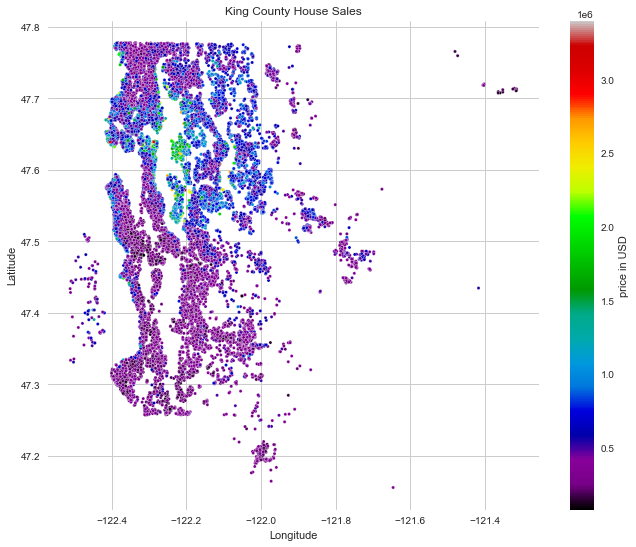

In [34]:
# Create a copy to manipulate
dfq2 = df.copy()

# Plot scatter plot
plt.figure(figsize = (11,9))
ax = sns.scatterplot(x = dfq2['long'], y = dfq2['lat'], hue = dfq2['price'],
                palette = 'nipy_spectral',s=10, legend = None, data = dfq2)

norm = plt.Normalize(dfq2['price'].min(), dfq2['price'].max())
smap = plt.cm.ScalarMappable(cmap='nipy_spectral', norm=norm)
smap.set_array([])

ax.figure.colorbar(smap, label = 'price in USD')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('King County House Sales')
plt.show()

From this visualisation we can already draw initial insights based on the houses' geographical locations. The highest house prices are concentrated in the area with latitude around 47.6 and longitude around -122.25. There is a disparity with southern locations achieving lower house prices.


# 5. Does the Presence of a waterfront feature affect its price?

From the maps, it is apparent that being on the waterfront is highly sought after and many of the most expensive houses in our dataset have this feature. We have been provided with a waterfront feature, which characterises houses which have a view of a waterfront. Let us investigate how this feature relates to price by using a boxplot.

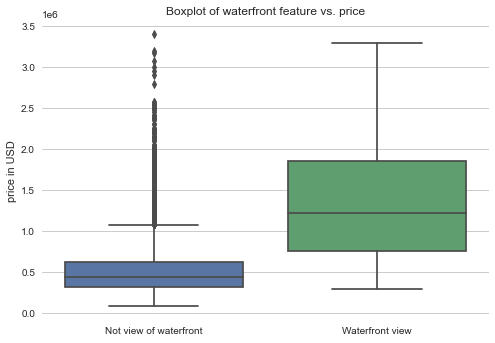

In [35]:
# Plot boxplot of waterfront feature
sns.boxplot(x = dfq2['waterfront'], y = dfq2['price'])
plt.title("Boxplot of waterfront feature vs. price")
plt.ylabel("price in USD")
plt.xlabel(None)
plt.xticks(np.arange(2), ('Not view of waterfront', 'Waterfront view'))
plt.show()

In [36]:
waterfrontmean = dfq2[dfq2['waterfront'] == 1]['price'].mean()
nonwaterfrontmean = dfq2[dfq2['waterfront'] == 0]['price'].mean()
print(f"The mean house price for a house with waterfront view is USD {round(waterfrontmean,2)}")
print(f"The mean house price for a house without waterfront view is USD {round(nonwaterfrontmean,2)}")

The mean house price for a house with waterfront view is USD 1358787.5
The mean house price for a house without waterfront view is USD 506141.73


In [37]:
len(dfq2[dfq2['waterfront'] == 1])/len(dfq2)*100

0.5606031316450802

From this analysis we can see that most houses in King County have no waterfront.
However, the houses with waterfront have the highest prices.

---------------------------------------------------------------------------------------------------------------------------

## 4.0 Data Analysis

## 5.1 Modeling
The objective of modeling is to build a model that has the ability to make accurate predictions of the target variable for new data, indicating that it can generalize well. The modeling procedure encompasses the selection of suitable algorithms, feature engineering, fine-tuning of hyperparameters, and evaluation of the model's performance.

### One Hot Encoding 

In [38]:
# Define one-hot encoding function
# This function Returns df with dummy vars and drops original column

def one_hot_encode(df, catcols):
    
    
    # Create DataFrame with above columns
    dfonehot = df[catcols].astype('category')
    
    # Get dummy variables and drop first one to not create dependency
    dfonehot = pd.get_dummies(dfonehot, drop_first = True)
    
    # Recreate DataFrame with one-hot encoded variables
    df = pd.concat([df,dfonehot], axis=1)
    
    # Drop columns where we have done one-hot encoding
    df = df.drop(catcols, axis = 1)
        
    return df

In [39]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month_sold', 'year_sold', 'age',
       'renovated', 'month_name', 'season'],
      dtype='object')

* Test for Linearity

Based on the data analysis, it appears that most of the variables have a linear relationship to the price, and their relationship appears to be homoscedastic. However, there are some variables, including sqft_lot, floors, condition, latitude, longitude and sqft_lot15, that do not seem to have a linear relationship with price. 

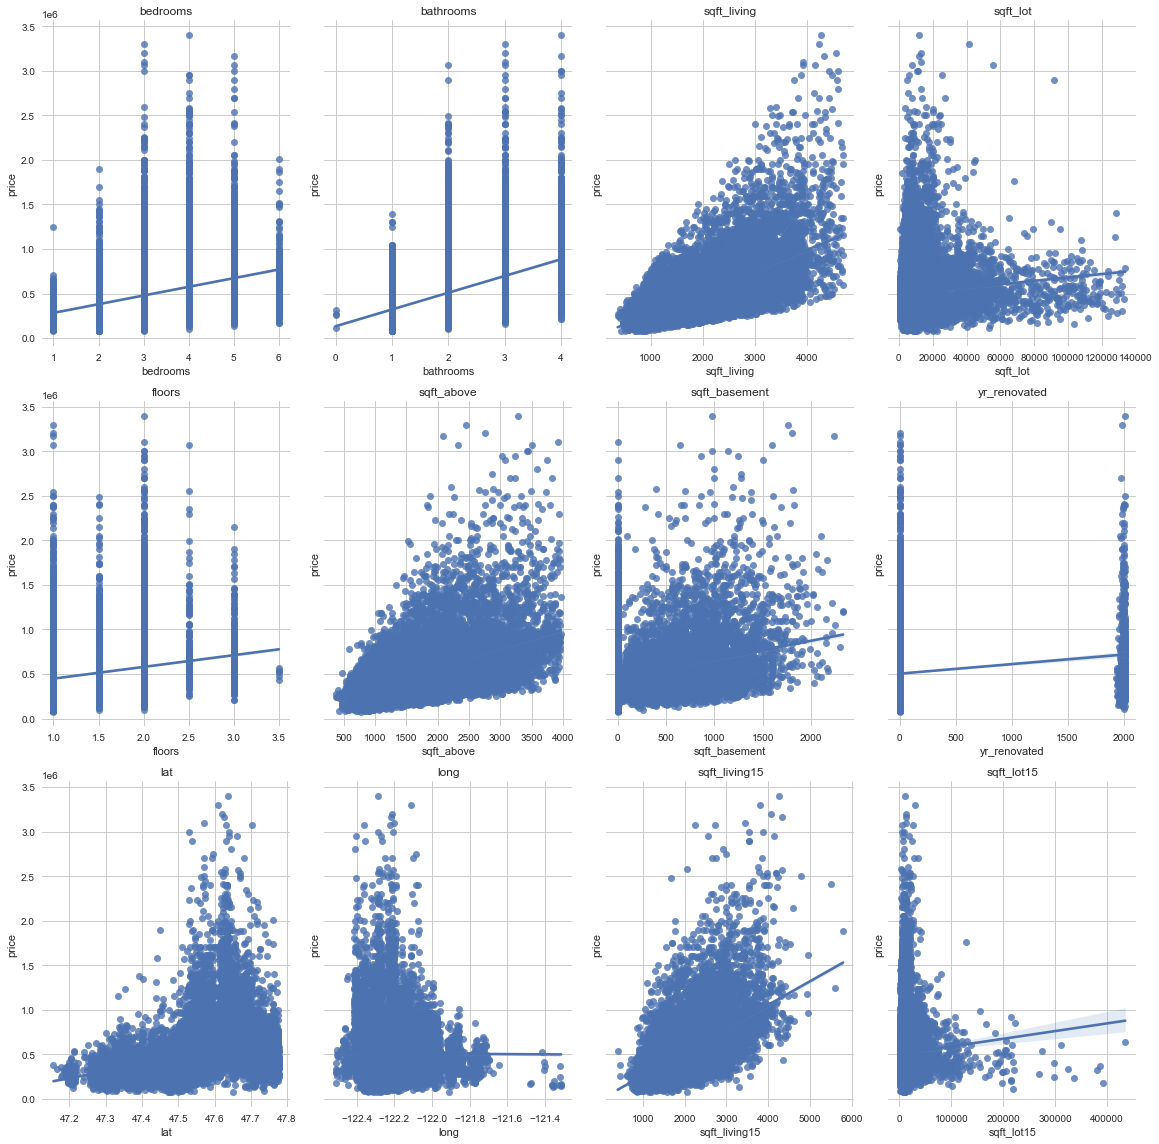

In [40]:
X = df.drop(columns=['price', 'season', 'month_name', 'month_sold', 'year_sold', 'grade', 'condition', 'view', 'waterfront', 'zipcode'], axis=1)
fig, axs = plt.subplots(3, 4, figsize=(16, 16), sharey=True)
for i in range(3):
    for j in range(4):
        if i*4 + j < len(X.columns):
            sns.regplot(x=X.iloc[:,i*4+j], y='price', data=df, ax=axs[i][j])
            axs[i][j].set_title(X.columns[i*4+j])
plt.tight_layout()
plt.show()

* Multi-collinearity

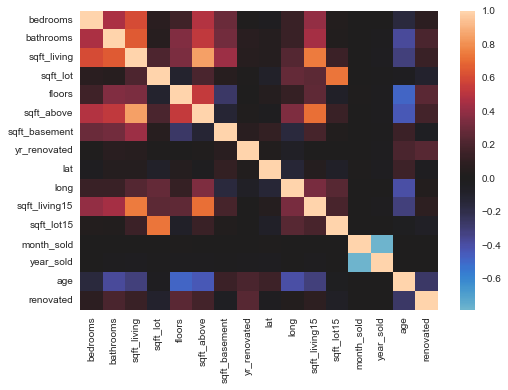

In [41]:
numeric_cols = df.select_dtypes(include='number').columns.drop('price')
corr_matrix = df[numeric_cols].corr()

sns.heatmap(corr_matrix, center=0)
plt.savefig('Images/multi-collinearity.png')


## Baseline Model Generation 

In [42]:
# Looking at correlations between other variables and price
df.corr()["price"]

price            1.000000
bedrooms         0.287461
bathrooms        0.440446
sqft_living      0.633164
sqft_lot         0.084227
floors           0.242786
sqft_above       0.513823
sqft_basement    0.300752
yr_renovated     0.132620
lat              0.365129
long            -0.006183
sqft_living15    0.569679
sqft_lot15       0.045560
month_sold      -0.018926
year_sold        0.013148
age             -0.009455
renovated        0.105561
Name: price, dtype: float64

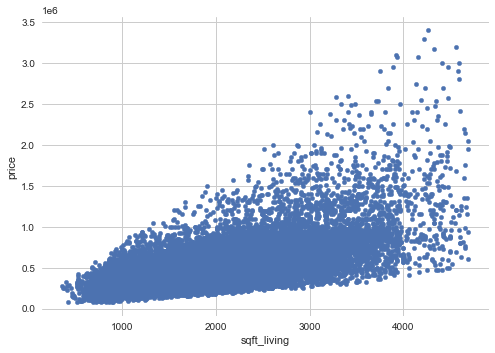

In [43]:
# Since Sqft_living is the feature with the strongest correlation in our dataset let's build our baseline model with that
df.plot.scatter(x="sqft_living", y="price");

There appears to be a fairly clear linear relationship between the Square footage of living space feature and price of a home in King County. We can use this to make a baseline model.

In [44]:
# Define parameters
y = df["price"]
X_baseline = df[["sqft_living"]]

In [45]:
baseline_results = fit_simple_linear_reg(df, 'price', 'sqft_living')
print(baseline_results)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                 1.384e+04
Date:                Thu, 20 Apr 2023   Prob (F-statistic):               0.00
Time:                        10:52:51   Log-Likelihood:            -2.8451e+05
No. Observations:               20692   AIC:                         5.690e+05
Df Residuals:                   20690   BIC:                         5.690e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         3.34e+04   4353.212      7.672      

C:\ProgramData\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [46]:
# display model coefficients
baseline_results.params

const          33398.629651
sqft_living      239.445414
dtype: float64

## Baseline Model results

Looking at our summary above, our regression line is
 $$ Price = $$33,399 +  239 * sqft\_living  

We can make the following observations from the results:

* The model is statistically significant with a p-value below 0.05.
* The model explains 40.1% of the variance in price, as indicated by the adjusted R-squared value.
* Both the intercept (const) and the slope (sqft_living) coefficients are statistically significant with t-statistic p-  values well below 0.05.
* For a house with a living space of 1000 square feet, we would expect the price to be about $272399.

* Generally speaking, as the living space of the house increases, so does the price of the house. 




### 5.2 Baseline Model visualization

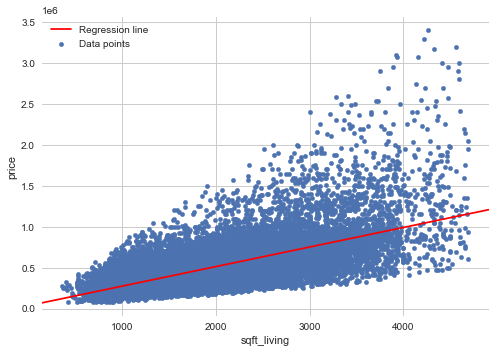

In [47]:
fig, ax = plt.subplots()
df.plot.scatter(x="sqft_living", y="price", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=baseline_results, label="Regression line", ax=ax, color="red")
ax.legend();

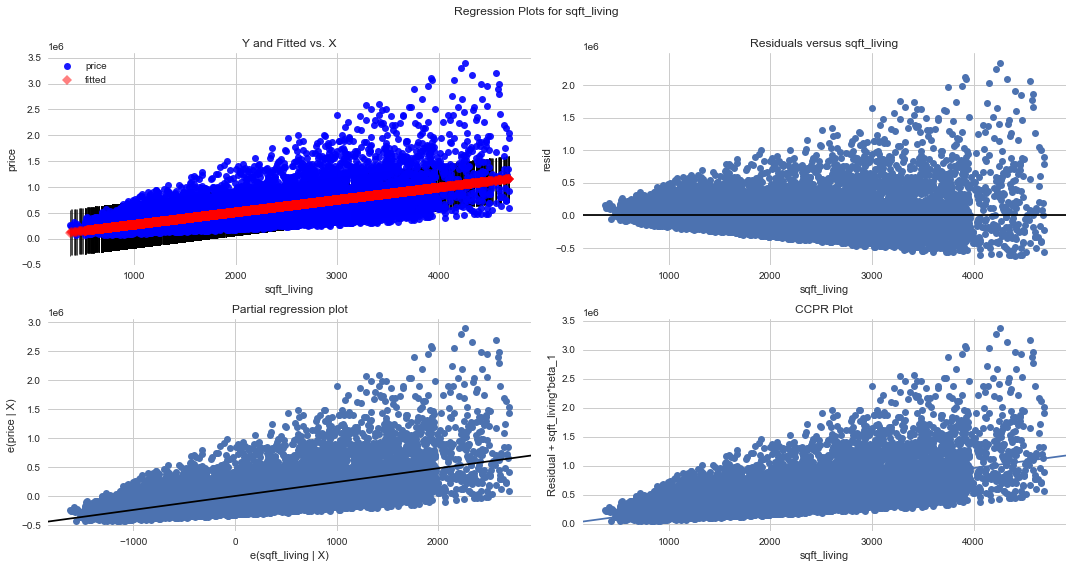

In [48]:
# create partial regression plots for the predictor

fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(baseline_results, "sqft_living", fig=fig)
plt.show()

# Multiple Linear Regression Model

In [49]:
## model 1
predictor_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'condition', 'month_sold','age','sqft_lot','yr_renovated'] 
multiple_model = fit_multiple_linear_reg(df, 'price', predictor_cols)
print(multiple_model)

Training R^2: 0.5312489269063179
Test R^2: 0.5276468297526171
(LinearRegression(), 0.5312489269063179, 0.5276468297526171)


The  R-squared value (0.5312489269063179), indicates that the model explains 53% of the variations in response variable.

The test training R-squared value indicates that the model is likely overfitting to the training data and not generalizing well to new data.

These results suggest that the multiple linear regression model may have overfit the training data, leading to poor performance on the test set. Further analysis and possibly model tuning may be needed to improve the model's performance.

In [50]:
predictor_cols1 = ["sqft_living", "bedrooms","bathrooms","sqft_lot","floors","yr_renovated", "waterfront", "zipcode"]
multiple_model1 = fit_multiple_linear_reg(df, 'price', predictor_cols1)
print(multiple_model1)

Training R^2: 0.46490040268810606
Test R^2: 0.4596271978135539
(LinearRegression(), 0.46490040268810606, 0.4596271978135539)


These results suggest that the multiple linear regression model may have overfit the training data, leading to poor performance on the test set. 


In [51]:
# polynomial regression
predictor_cols = ['sqft_living']
degree = 2
poly_test = fit_polynomial_reg(df, 'price', predictor_cols, degree)

Training R^2: 0.42402287530261273
Test R^2: 0.42608098091507784


These results suggest that the polynomial regression model may have overfit the training data, leading to poor performance on the test set. 

The reason for performing polynomial regression is to capture more complex, nonlinear relationships between the predictor and target variables.

In simple linear regression, you model the relationship between the target and a single predictor variable using a straight line. However, in many real-world scenarios, the relationship between the target and the predictor may not be linear, but rather curvilinear or have some other shape.
Polynomial regression addresses this issue by adding polynomial features to the model, which allow it to capture more complex relationships between the predictors and the target variable. By doing so, it can improve the model's fit to the data and potentially lead to better predictive performance.


## Model 2

In [52]:
# Initial feature colums
predictor_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'zipcode']
predictor_cols_results = fit_simple_linear_reg(df, 'price', predictor_cols)
print(predictor_cols_results)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     2894.
Date:                Thu, 20 Apr 2023   Prob (F-statistic):               0.00
Time:                        10:53:08   Log-Likelihood:            -2.8350e+05
No. Observations:               20692   AIC:                         5.670e+05
Df Residuals:                   20685   BIC:                         5.671e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5.078e+07    2.8e+06    -18.150      

C:\ProgramData\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Looking at our summary above, our regression line is
 $$ Price = -5.078e+07-4.645e+04 * bedrooms+2.991e+04 bathrooms + 254.5901 sqft_living + 8277.1965 floors + 6.573e+05 waterfront+518.6152 zipcode

In this case, the R-squared value is 0.456, which means that the independent variables explain about 45.6% of the variance in house prices.

The second section of the output provides the coefficients and standard errors of the independent variables. The coefficient represents the change in the dependent variable that is associated with a one-unit change in the corresponding independent variable, holding all other variables constant.

The constant term is -5.078e+07, which is the estimated value of the dependent variable when all independent variables are zero.

For the remaining variables:

A one-unit increase in 'bedrooms' is associated with a decrease of $46,450 in house prices, holding all other variables constant.
A one-unit increase in 'bathrooms' is associated with an increase of $29,910 in house prices, holding all other variables constant.
A one-unit increase in 'sqft_living' is associated with an increase of $254.59 in house prices, holding all other variables constant.
A one-unit increase in 'floors' is associated with an increase of $8,277.20 in house prices, holding all other variables constant.
A house located in a waterfront area has a mean house price that is $657,300 higher than a house not located in a waterfront area, holding all other variables constant.

In this output, all independent variables have p-values less than 0.05, indicating that they are statistically significant predictors of house prices.


# Model 3

In [53]:
# Moving to our second list of features to see if it will improve. 
predictor_cols1 = ["sqft_living", "bedrooms","bathrooms","sqft_lot","floors","sqft_above","yr_renovated", "waterfront", "zipcode"]
predictor_cols1_results = fit_simple_linear_reg(df, 'price', predictor_cols1)
print(predictor_cols1_results)

C:\ProgramData\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     1992.
Date:                Thu, 20 Apr 2023   Prob (F-statistic):               0.00
Time:                        10:53:08   Log-Likelihood:            -2.8335e+05
No. Observations:               20692   AIC:                         5.667e+05
Df Residuals:                   20682   BIC:                         5.668e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -4.143e+07   2.89e+06    -14.344   

The R-squared value of 0.464 indicates that the model explains 46.4% of the variance in the dependent variable. The adjusted R-squared value is the same, which suggests that adding or removing explanatory variables does not significantly improve the fit of the model.

The P-values (P>|t|) indicate the statistical significance of each variable. A low P-value (typically below 0.05) suggests that the variable is statistically significant and has a significant effect on the dependent variable.

The intercept or constant term is -4.143e+07, which represents the estimated value of the dependent variable when all independent variables are equal to zero.

The "const" coefficient represents the intercept or constant term, which is the estimated value of the dependent variable when all independent variables are equal to zero. In this case, the intercept is -4.143e+07, which means that if all other independent variables are zero, the estimated value of "price" is negative 41,430,000 dollars. However, since it's not possible for all independent variables to be zero in practice, the intercept should be interpreted with caution.

The "sqft_living" coefficient is 272.8535, which means that a one-unit increase in "sqft_living" is associated with an increase in "price" of 272.8535 dollars, holding all other variables constant.

The "bedrooms" coefficient is -4.704e+04, which means that a one-unit increase in "bedrooms" is associated with a decrease in "price" of 47,040 dollars, holding all other variables constant.

The "bathrooms" coefficient is 2.414e+04, which means that a one-unit increase in "bathrooms" is associated with an increase in "price" of 24,140 dollars, holding all other variables constant.

The "sqft_lot" coefficient is -0.9808, which means that a one-unit increase in "sqft_lot" is associated with a decrease in "price" of 0.9808 dollars, holding all other variables constant.

The "floors" coefficient is 1.286e+04, which means that a one-unit increase in "floors" is associated with an increase in "price" of 12,860 dollars, holding all other variables constant.

The "sqft_above" coefficient is -19.5153, which means that a one-unit increase in "sqft_above" is associated with a decrease in "price" of 19.5153 dollars, holding all other variables constant.


The "waterfront" coefficient is 6.438e+05, which means that a property located on the waterfront is associated with an increase in "price" of 643,800 dollars, holding all other variables constant.



Overall, the model appears to have a good fit based on the high F-statistic and low Prob (F-statistic) value, indicating that the explanatory variables as a whole are statistically significant in explaining the dependent variable. However, it is important to further evaluate the model's assumptions and check for potential issues such as multicollinearity, heteroscedasticity, or outliers.

## Model 4

In [54]:
# Now our model will match same number of parameters as the first multimodel 
predictor_cols2 = ["sqft_living","bathrooms","floors","yr_renovated", "waterfront", "zipcode"]
predictor_cols2_results = fit_simple_linear_reg(df, 'price', predictor_cols2)
print(predictor_cols2_results)

C:\ProgramData\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     2830.
Date:                Thu, 20 Apr 2023   Prob (F-statistic):               0.00
Time:                        10:53:08   Log-Likelihood:            -2.8361e+05
No. Observations:               20692   AIC:                         5.672e+05
Df Residuals:                   20685   BIC:                         5.673e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -5.076e+07   2.82e+06    -18.029   

The constant term is -5.076e+07, which represents the estimated value of "price" when all the independent variables are zero.

For "sqft_living", the coefficient is 226.2587, which indicates that, on average, a one-unit increase in square footage of living space is associated with an increase of $226.26 in the price of the house.

For "bathrooms", the coefficient is 1.918e+04, which indicates that, on average, a one-unit increase in the number of bathrooms is associated with an increase of $19,180 in the price of the house.

For "floors", the coefficient is 1.462e+04, which indicates that, on average, a one-unit increase in the number of floors is associated with an increase of $14,620 in the price of the house.

For "yr_renovated", the coefficient is 63.1908, which indicates that, on average, a one-unit increase in the year of renovation is associated with an increase of $63.19 in the price of the house.

For "waterfront", the coefficient is 6.643e+05, which indicates that, on average, a house with a waterfront location is associated with an increase of $664,300 in the price of the house compared to a house without a waterfront location.

In summary, the model suggests that the square footage of living space, number of bathrooms, number of floors, year of renovation, and waterfront location are significant predictors of the house price.

Overall, the model explains 45.1% of variations in response variable. It appears a good fit since its statistically significant even though it explains low percentage of variations.

### Plotting Residuals for multiple models

#### Model Two

In [55]:
def plot_partial_residuals_all(results, predictor_cols):
    fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(16, 8), sharey=True)
    axs = axs.flatten()

    for i, col in enumerate(predictor_cols):
        plot_partial_residuals(results, focus_exog=col, ax=axs[i])
        axs[i].set_xlabel('Predictor')
        axs[i].set_ylabel('Partial Residual')
        axs[i].set_title(col)

    plt.tight_layout()
    plt.show()

#### Model Three

In [56]:
From 
predictor_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'zipcode']
plot_partial_residuals_all(predictor_cols_results,predictor_cols )

NameError: name 'From' is not defined

In [ ]:
# Plot partial residual plots
# for predictor_cols1 = ["sqft_living", "bedrooms","bathrooms",
#"sqft_lot","floors","sqft_above","yr_renovated", "waterfront", "zipcode"]
fig, ax = plt.subplots(ncols=2, figsize=(14, 6))

# Square foor living
plot_partial_residuals(predictor_cols1_results, focus_exog="sqft_living", ax=ax[0])
ax[0].set_xlabel('Predictor')
ax[0].set_ylabel('Partial Residual')

# waterFront
plot_partial_residuals(predictor_cols1_results, focus_exog="waterfront", ax=ax[1])
ax[1].set_xlabel('Predictor')
ax[1].set_ylabel('Partial Residual');

plt.tight_layout()
plt.show()


fig, ax2 = plt.subplots(ncols=2, figsize=(14, 6))

# bedrooms 
plot_partial_residuals(predictor_cols1_results, focus_exog="bedrooms", ax=ax2[0])
ax2[0].set_xlabel('Predictor')
ax2[0].set_ylabel('Partial Residual')

# bathrooms
plot_partial_residuals(predictor_cols1_results, focus_exog="bathrooms", ax=ax2[1])
ax2[1].set_xlabel('Predictor')
ax2[1].set_ylabel('Partial Residual');

plt.tight_layout()
plt.show()

fig, ax3 = plt.subplots(ncols=2, figsize=(14, 6))

# floors 
plot_partial_residuals(predictor_cols1_results, focus_exog="floors", ax=ax3[0])
ax3[0].set_xlabel('Predictor')
ax3[0].set_ylabel('Partial Residual')

# yr_renovated
plot_partial_residuals(predictor_cols1_results, focus_exog="yr_renovated", ax=ax3[1])
ax3[1].set_xlabel('Predictor')
ax3[1].set_ylabel('Partial Residual');

plt.tight_layout()
plt.show()

fig, ax4 = plt.subplots(ncols=3, figsize=(14, 6))

# sqft_lot 
plot_partial_residuals(predictor_cols1_results, focus_exog="sqft_lot", ax=ax4[0])
ax4[0].set_xlabel('Predictor')
ax4[0].set_ylabel('Partial Residual')

# sqft_above
plot_partial_residuals(predictor_cols1_results, focus_exog="sqft_above", ax=ax4[1])
ax4[1].set_xlabel('Predictor')
ax4[1].set_ylabel('Partial Residual')

# zipcode
plot_partial_residuals(predictor_cols1_results, focus_exog="zipcode", ax=ax4[1])
ax4[1].set_xlabel('Predictor')
ax4[1].set_ylabel('Partial Residual');

plt.tight_layout()
plt.show()

### Model Four

In [ ]:
predictor_cols2 = ["sqft_living","bathrooms","floors","yr_renovated", "waterfront", "zipcode"]
plot_partial_residuals_all(predictor_cols2_results,predictor_cols2 )

### Plotting Fitted Values for Multiple Models

In [ ]:

def plot_fitted_values_all(results, predictor_cols):
    """
    Plots the fitted values for all predictor variables against their observed values.

    Parameters:
    results (OLSRegressionResults): the results of a fitted linear regression model
    predictor_cols (list of str): the names of the predictor columns

    Returns:
    None
    """
    fig, axs = plt.subplots(len(predictor_cols), 1, figsize=(8, 3*len(predictor_cols)), sharex=False)

    for i, col in enumerate(predictor_cols):
        axs[i].scatter(results.model.exog[:, i+1], results.fittedvalues, alpha=0.5)
        axs[i].set_xlabel(col)
        axs[i].set_ylabel('Fitted Value')

    plt.tight_layout()
    plt.show()

#### Model Two

In [ ]:
predictor_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'zipcode']
predictor_cols_results
plot_fitted_values_all(predictor_cols_results, predictor_cols)

#### Model Three

In [ ]:
predictor_cols1 = ["sqft_living", "bedrooms","bathrooms","sqft_lot","floors","sqft_above","yr_renovated", "waterfront", "zipcode"]
predictor_cols1_results
plot_fitted_values_all(predictor_cols1_results, predictor_cols1)

#### Model Four

In [ ]:
# Extracting the fit
plot_fit = predictor_cols2_results.fittedvalues

# Plotting the fitted values
fig, axs = plt.subplots(ncols=len(predictor_cols2), figsize=(20, 4))

for i, col in enumerate(predictor_cols2):
    axs[i].scatter(df[col], plot_fit, alpha=0.5)
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Fitted Value')

plt.tight_layout()
plt.show()

## Model Valuation

Overall, Model 3 appears to be a better model for predicting house prices in King County

In [ ]:
## rmse ## metrics?
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Fit a linear regression model on the training data
lr = LinearRegression()
lr.fit(X_train, y_train)
# Predict the target variable on the testing data
y_pred = lr.predict(X_test)
# Calculate the RMSE
rmse = calculate_rmse(y_test, y_pred)
print('RMSE:', rmse)

In [1]:
# command to convert notebook to presentation
jupyter nbconvert --to slides presentation.ipynb

SyntaxError: invalid syntax (836361991.py, line 2)